In [ ]:
# 1. 라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

데이터 크기: (1797, 64) (1797,)


<Figure size 640x480 with 0 Axes>

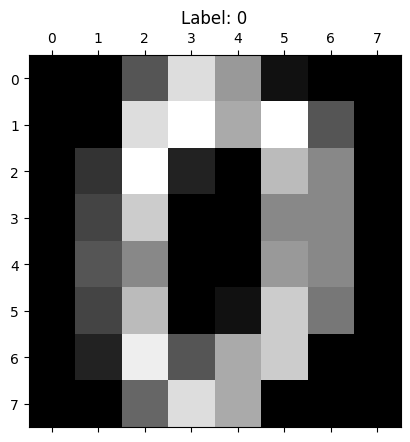

In [ ]:
# 2. 필기체 데이터 불러오기
digits = load_digits()
X = digits.data
y = digits.target
print("데이터 크기:", X.shape, y.shape)
# 샘플 이미지 확인
plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Label: {digits.target[0]}")
plt.show()
# 3. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

📌 Decision Tree
정확도: 0.8425925925925926
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.74      0.78      0.76        50
           2       0.83      0.74      0.79        47
           3       0.78      0.85      0.81        54
           4       0.81      0.85      0.83        60
           5       0.92      0.86      0.89        66
           6       0.93      0.94      0.93        53
           7       0.85      0.84      0.84        55
           8       0.89      0.77      0.82        43
           9       0.78      0.85      0.81        59

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540



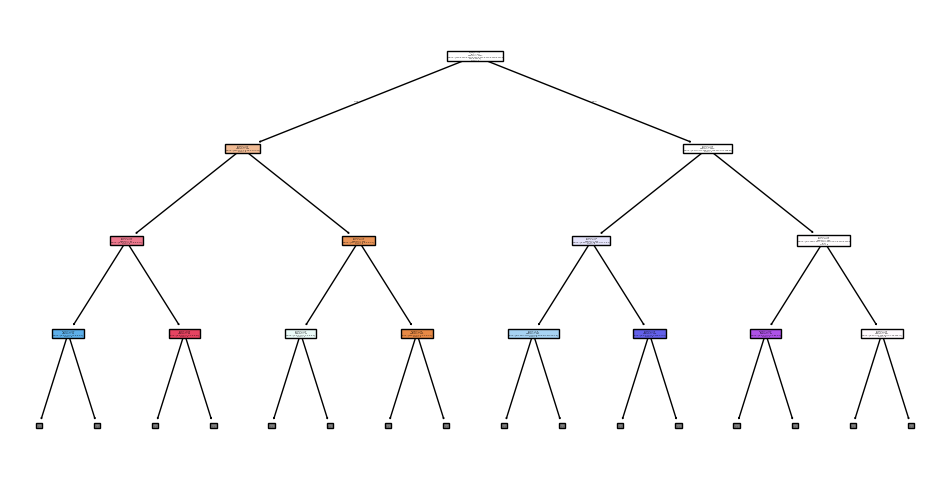

In [ ]:
# 4-1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("📌 Decision Tree")
print("정확도:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(12,6))
plot_tree(dt_model, filled=True, max_depth=3, feature_names=None, class_names=[str(i) for i in range(10)])
plt.show()

In [ ]:
# 4-2. Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n📌 Logistic Regression")
print("정확도:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


📌 Logistic Regression
정확도: 0.9685185185185186
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.95      0.95        66
           6       0.96      0.98      0.97        53
           7       1.00      0.96      0.98        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
# 4-3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n📌 Random Forest")
print("정확도:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n혼동 행렬 (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


📌 Random Forest
정확도: 0.975925925925926
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       0.97      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


혼동 행렬 (Random Forest):
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. 데이터셋 준비 (MNIST 0~9 손글씨)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. 신경망 모델 정의 (Forward + Activation)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()               # Activation (은닉층)
        self.softmax = nn.LogSoftmax(dim=1) # Activation (출력층)

    def forward(self, x):
        # (1) Forward Propagation
        x = x.view(-1, 28*28)          # 28x28 → 784 벡터
        x = self.relu(self.fc1(x))     # FC1 + ReLU
        x = self.relu(self.fc2(x))     # FC2 + ReLU
        x = self.softmax(self.fc3(x))  # FC3 + Softmax
        return x

model = MLP()

# (2) Loss Function 정의
criterion = nn.NLLLoss()   # 다중 분류용 (CrossEntropy와 동일)

# (3) Optimizer 정의
optimizer = optim.Adam(model.parameters(), lr=0.001)

# (4) 학습 과정 (Forward + Loss + Backward + Optimizer)
for epoch in range(5):  # 5 epoch만 학습
    for images, labels in train_loader:
        # Forward Propagation
        outputs = model(images)

        # Loss Function 계산
        loss = criterion(outputs, labels)

        # Backward Propagation
        optimizer.zero_grad()   # 기울기 초기화
        loss.backward()         # 역전파로 gradient 계산

        # Optimizer로 가중치 업데이트
        optimizer.step()

    print(f"Epoch [{epoch+1}/5], Loss: {loss.item():.4f}")

# (5) 평가 단계
correct, total = 0, 0
with torch.no_grad():  # 평가 시에는 gradient 계산 X
    for images, labels in test_loader:
        outputs = model(images)          # Forward
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("테스트 정확도:", correct / total)


Epoch [1/5], Loss: 0.6753
Epoch [2/5], Loss: 0.0338
Epoch [3/5], Loss: 0.3427
Epoch [4/5], Loss: 0.0719
Epoch [5/5], Loss: 0.0491
테스트 정확도: 0.9706


In [3]:
# 1. 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/diabetes_no_outcome.csv')

# BMI를 타겟으로, 나머지를 입력으로 설정
X = df.drop(columns=['BMI'])
y = df['BMI']

# 3. 데이터 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 4. 회귀용 신경망 정의 (Forward + Activation)
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))  # 입력층 → 은닉층
        x = self.relu(self.fc2(x))  # 은닉층 → 은닉층
        x = self.fc3(x)             # 출력층 (회귀이므로 활성화 없음)
        return x

model = RegressionModel()

# 5. 손실 함수 & 옵티마이저 정의
criterion = nn.MSELoss()              # 회귀 → 평균제곱오차
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 6. 학습 루프 (Forward + Loss + Backward + Optimizer)
epochs = 300

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:  # 20회마다 출력
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 7. 평가 단계
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f'\n테스트 MSE: {test_loss.item():.4f}')
    rmse = torch.sqrt(test_loss)
    print(f'테스트 RMSE: {rmse.item():.4f}')



Epoch [20/300], Loss: 149.0950
Epoch [40/300], Loss: 91.4071
Epoch [60/300], Loss: 55.7327
Epoch [80/300], Loss: 47.7488
Epoch [100/300], Loss: 42.4979
Epoch [120/300], Loss: 39.2112
Epoch [140/300], Loss: 37.0568
Epoch [160/300], Loss: 35.7338
Epoch [180/300], Loss: 34.8452
Epoch [200/300], Loss: 34.2029
Epoch [220/300], Loss: 33.6839
Epoch [240/300], Loss: 33.2551
Epoch [260/300], Loss: 32.8316
Epoch [280/300], Loss: 32.4042
Epoch [300/300], Loss: 31.9281

테스트 MSE: 60.6538
테스트 RMSE: 7.7881
